<center>
<h1> <b>Transient Response of RL Circuit - Three Phase</b></h1>

Dr. Bingsen Wang

3/19/2023
</center>


#Introduction

This analysis is focused on the steady state and transient responses of RL circuit fed by sinusoidal voltage sources. The intent is to determine the maximum value of the peak current of the transient reponse and the conditions for such peak current.

#Steady State Response

A three-phase RL circuit is fed by two sets of sinusoidal voltage sources, $v_{a1}(t),v_{b1}(t),v_{c1}(t)$ and $v_{a2}(t),v_{b2}(t),v_{c2}(t)$. Without loss of generality, the phase angle of $v_{a2}(t)$ is zero.
$$\begin{align}
v_{a1}(t) &= V_1\cos(\omega t +\theta_1)\\
v_{b1}(t) &= V_1\cos\left(\omega t + \theta_1-\frac{2\pi}{3}\right)\\
v_{c1}(t) &= V_1\cos\left(\omega t + \theta_1+\frac{2\pi}{3}\right)
\end{align}\tag{1}$$

$$\begin{align}
v_{a2}(t) &= V_1\cos(\omega t )\\
v_{b2}(t) &= V_1\cos\left(\omega t - \frac{2\pi}{3}\right)\\
v_{c2}(t) &= V_1\cos\left(\omega t + \frac{2\pi}{3}\right)
\end{align}\tag{2}$$
The voltage across the RL load is
$$\begin{align}
v_a(t) &= v_{a1}(t) - v_{a2}(t) = V_{12}\cos(\omega t + \theta_{12})\\
v_b(t) &= v_{b1}(t) - v_{b2}(t) = V_{12}\cos\left(\omega t + \theta_{12} - \frac{2\pi}{3}\right)\\
v_c(t) &= v_{c1}(t) - v_{c2}(t) = V_{12}\cos\left(\omega t + \theta_{12} + \frac{2\pi}{3}\right)
\end{align}\tag{3}$$

where 
$$\begin{align}
V_{12} &= \sqrt{V_1^2 + V_2^2 - 2V_1V_2\cos\theta_1}\\
\theta_{12} &= \pi - \arcsin\left( \frac{V_1}{V_2} \sin\theta_1 \right)
\end{align}$$

The steady-state currents through the RL impedance is
$$\begin{align}
i_a(t) &= I\cos(\omega t + \theta_I)\\
i_b(t) &= I\cos\left(\omega t + \theta_I - \frac{2\pi}{3}\right)\\
i_c(t) &= I\cos\left(\omega t + \theta_I + \frac{2\pi}{3}\right)
\end{align}\tag{4}$$
where 
$$\begin{align}
I &= \frac{V_{12}}{\sqrt{R^2 + (\omega L)^2}}\\
\theta_I &= \theta_{12} - \arccos\left(\frac{R}{\sqrt{R^2 + (\omega L)^2}}\right)
\end{align}$$

#Transient Response

The transient response is due to the voltage source $v_1(t) = 0$, for $t\ge t_0$.

The current i(t) for $t\ge t_0$ is
$$\begin{align}
i_a(t) &= I_{a\_tr} e^{-(t-t_0)/\tau} + I_{ss}\cos(\omega t + \theta_{ss})\\
i_b(t) &= I_{b\_tr} e^{-(t-t_0)/\tau} + I_{ss}\cos\left(\omega t + \theta_{ss} - \frac{2\pi}{3}\right)\\
i_c(t) &= I_{c\_tr} e^{-(t-t_0)/\tau} + I_{ss}\cos\left(\omega t + \theta_{ss} + \frac{2\pi}{3}\right)
\end{align}\tag{5}$$
with the initial condition being 
$$\begin{align}
I_{a0} &= i_a(t_0) = I\cos(\omega t_0 + \theta_{12})\\
I_{b0} &= i_b(t_0) = I\cos\left(\omega t_0 + \theta_{12} - \frac{2\pi}{3}\right)\\
I_{c0} &= i_c(t_0) = I\cos\left(\omega t_0 + \theta_{12} + \frac{2\pi}{3}\right)\end{align}\tag{6}$$.

Since the steady state component is only due to the forced input $v_2(t)$, we have
$$\begin{align}
I_{ss} &= \frac{V_2}{\sqrt{R^2 + (\omega L)^2}}\\
\theta_{ss} &= \pi - \arctan\left(\frac{\omega L}{R}\right)
\end{align}\tag{7}$$
The initial conditions in (6) and letting $t=t_0$ in (5) yield
$$\begin{align}
I_{a\_tr} &= I_{a0} - I_{ss}\cos(\omega t_0 +\theta_{ss})\\
I_{b\_tr} &= I_{b0} - I_{ss}\cos\left(\omega t_0 +\theta_{ss} - \frac{2\pi}{3}\right)\\
I_{c\_tr} &= I_{c0} - I_{ss}\cos\left(\omega t_0 +\theta_{ss} + \frac{2\pi}{3}\right)
\end{align}\tag{8}$$

In [ ]:
# You only need to install once in each session.
# Therefore, I had this line of code in a separate code cell.
# With '!' in front of "pip", the package is only installed if it is missing.
!pip install schemdraw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 9.8 MB/s eta 0:00:00


<ipython-input-3-35f34281a00e>:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


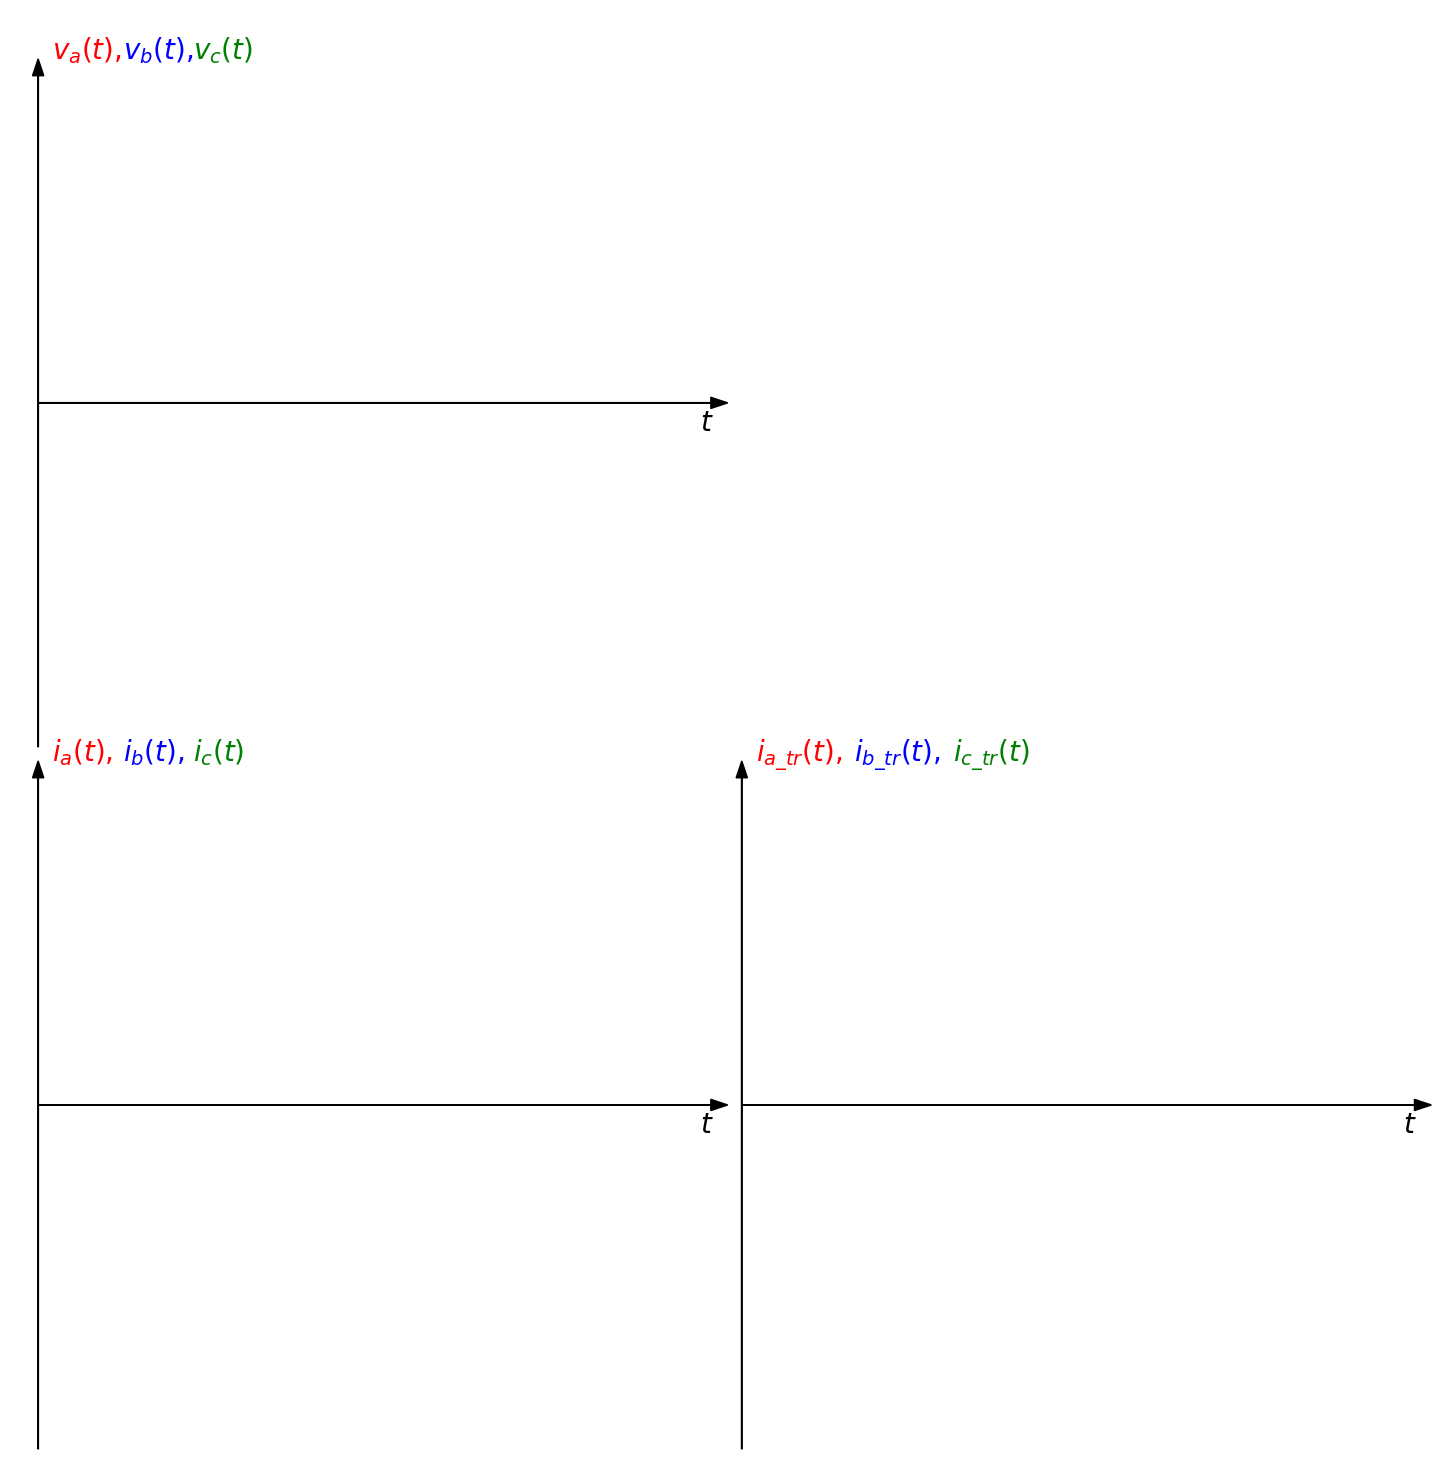

In [ ]:
from os import linesep
import schemdraw
import schemdraw.elements as elm

import numpy as np
from numpy import linspace,cos,sin,arccos,pi,exp,heaviside,fft,angle,log,sqrt
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')

# function to draw the circuit diagram
def drawCircuitDiagram(ax,asc):
  if asc == 1:
    v1Color = 'white'
    shortLineColor='black'
  else:
    v1Color = 'black'
    shortLineColor = 'white'
  with schemdraw.Drawing(show=False) as d:
    #phase - a
    Va1 = d.add(elm.SourceSin(color=v1Color).right().length(d.unit*1))
    d += elm.Line().right(0.5)
    L = d.add(elm.Inductor2())
    d += elm.Resistor()
    d += elm.CurrentLabelInline('in').at(L).color('r')
    Va2 = d.add(elm.SourceSin().right().length(d.unit*1))
    #phase - b
    d += elm.Line(color=v1Color).down(4).at(Va1.start)
    Vb1 = d.add(elm.SourceSin(color=v1Color).right().length(d.unit*1))
    d += elm.Line().right(0.5)
    L = d.add(elm.Inductor2())
    d += elm.Resistor()
    d += elm.CurrentLabelInline('in').at(L).color('b')
    Vb2 = d.add(elm.SourceSin().right().length(d.unit*1))
    #phase - c
    d += elm.Line(color=v1Color).down(4).at(Vb1.start)
    Vc1 = d.add(elm.SourceSin(color=v1Color).right().length(d.unit*1.))
    d += elm.Line().right(0.5)
    L = d.add(elm.Inductor2())
    d += elm.Resistor()
    d += elm.CurrentLabelInline('in').at(L).color('g')
    Vc2 = d.add(elm.SourceSin().right().length(d.unit*1))
    d += elm.Line().down(8).at(Va2.end)

    #draw the line for active short circuit
    d += elm.Line(color=shortLineColor).down(8).at(Va1.end)

  ax.clear() # clear axis before drawing
  d.draw(ax=ax)
  ax.axis('off')
  ax.text(3.25,0.25,r'$i_a(t)$',size=20, color='r')
  ax.text(3.25,-3.75,r'$i_b(t)$',size=20, color='b')
  ax.text(3.25,-7.75,r'$i_c(t)$',size=20, color='g')

  ax.text(5,0.5,r'$L$',size=24)
  ax.text(7.5,0.5,r'$R$',size=24)
  ax.text(4,-1,'+                 -',size=24,color='r')
  ax.text(5.5,-1,r'$v_a(t)$',size=20, color = 'r')
  ax.text(4,-5,'+                 -',size=24,color='b')
  ax.text(5.5,-5,r'$v_b(t)$',size=20, color = 'b')
  ax.text(4,-9,'+                 -',size=24,color='g')
  ax.text(5.5,-9,r'$v_c(t)$',size=20, color = 'g')
  return


w = 2*pi*60
Pb = 5000 # base power
Vb = 120 # base voltage in rms
Ib = Pb/Vb # base current in rms
Zb = Vb/Ib # base impedance in ohm
Xpu = 0.6 # reactance of the inductance in per unit
X = Xpu * Zb # ractance in ohm
L = X/w # inductance in Henry
tau = 1.5*(2*pi/w) # time constant of the RL circuit, 3 times the ac period
R = L/tau
Rpu = R/Zb
V2pu = 1.0 #
Ipu = 1.0 # current magnitude before t0 
theta_I = 0
Isspu = V2pu/abs(Rpu + 1j*Xpu) # steady state current magnitude after t0
theta_Iss = pi - angle(Rpu + 1j*Xpu)
V1pu = abs(V2pu + Ipu*exp(1j*theta_I)*(Rpu + 1j*Xpu))
theta1 = angle(V2pu + Ipu*exp(1j*theta_I)*(Rpu + 1j*Xpu))

def v1(t,t0,n):
  #n = 0,1,2 for phase a,b,c, respectively
  return V1pu*cos(w*t + theta1 - n*2*pi/3)*heaviside(t0-t,0)

def v2(t,n):
  #n = 0,1,2 for phase a,b,c, respectively
  return V2pu*cos(w*t - n*2*pi/3)

def v(t,t0,n):
  return v1(t,t0,n) - v2(t,n)

def iss(t,t0,n):
  #n = 0,1,2 for phase a,b,c, respectively
  return Ipu*cos(w*t + theta_I - n*2*pi/3)*heaviside(t0 - t,1) + Isspu*cos(w*t + theta_Iss - n*2*pi/3)*heaviside(t-t0, 0)

def itr(t,t0,n):
  Itr = Ipu*cos(w*t0 + theta_I - n*2*pi/3) - Isspu*cos(w*t0 + theta_Iss - n*2*pi/3)
  return Itr*exp(-(t-t0)/tau)*heaviside(t-t0,0)

def ii(t,t0,n):
  return iss(t,t0,n) + itr(t,t0,n)

Nppc = 1024 # number of points per cycle
Nc = 7 # number of cycles
Npt = Nc*Nppc # total number of points
T_stop = Nc*2*pi/w # duration of the plot
t = linspace(0,T_stop,Npt)

Nf1 =20 # number of waveforms
Nf2 = 40 # number of animations per waveform
Nf = Nf1*Nf2
t0 = linspace(T_stop*0.2,T_stop*0.2+2*pi/w,Nf1)


fig = plt.figure(figsize=(15,15))
ax = plt.axes(xlim=(-0.1, 5), ylim=(-2.5, 2.65))
ax2 = fig.add_axes([0.55, 0.6, 0.4, 0.275]) # drawing area for circuit diagram
ax3 = fig.add_axes([0.1, 0.6, 0.4, 0.35]) # drawing area for phasor diagram

fig.tight_layout()
ax.axis('off')
ax2.axis('off')
ax3.axis('off')

x0 = [0,0,2.5] # orgins of x-axis
y0 = [1.25,-1.25,-1.25] # origins of y-axis
xln = [2.45, 2.45, 2.45] # length of x-axis
yln = [2.45, 2.45, 2.45] # length of y-axis

# plot x,y axes
ax.arrow(x0[0], y0[0], xln[0], 0, width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[0], y0[0]-0.5*yln[0], 0, yln[0], width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[1],y0[1], xln[1], 0, width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[1], y0[1]-0.5*yln[1], 0, yln[1], width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[2], y0[2], xln[2], 0, width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)
ax.arrow(x0[2], y0[2]-0.5*yln[2], 0, yln[2], width=0.002, head_width=0.04, ec='k', fc='k', length_includes_head=True)


ax.text(x0[0]+0.05, y0[0]+yln[0]*0.5, r'$v_a(t)$,', size = 20, color='r')
ax.text(x0[0]+0.30, y0[0]+yln[0]*0.5, r'$v_b(t),$', size = 20, color='b')
ax.text(x0[0]+0.55, y0[0]+yln[0]*0.5, r'$v_c(t)$', size = 20, color='g')
ax.text(x0[0]+xln[0]-0.1, y0[0] - 0.1, r'$t$', size = 20)
ax.text(x0[1]+0.05, y0[1]+yln[1]*0.5, r'$i_a(t),$', size = 20, color='r')
ax.text(x0[1]+0.30, y0[1]+yln[1]*0.5, r'$i_b(t),$', size = 20, color='b')
ax.text(x0[1]+0.55, y0[1]+yln[1]*0.5, r'$i_c(t)$', size = 20, color='g')
ax.text(x0[1]+xln[1]-0.1, y0[1]-0.1, r'$t$',size = 20)
ax.text(x0[2]+0.05, y0[2]+yln[2]*0.5, r'$i_{a\_tr}(t),$', size = 20, color='r')
ax.text(x0[2]+0.40, y0[2]+yln[2]*0.5, r'$i_{b\_tr}(t),$', size = 20, color='b')
ax.text(x0[2]+0.75, y0[2]+yln[2]*0.5, r'$i_{c\_tr}(t)$', size = 20, color='g')
ax.text(x0[2]+xln[2]-0.1, y0[2]-0.1, r'$t$',size = 20)

# debug
# ax.plot(t/T_stop*xln[0]+x0[0],y0[0] + v1t*yln[0]*0.45)
# ax.plot(t/T_stop*xln[0]+x0[0],y0[0] + v2t*yln[0]*0.45)
# ax.plot(t/T_stop*xln[1]+x0[1],y0[1] + it*yln[1]*0.2)
# ax.plot(t/T_stop*xln[2]+x0[2],y0[2] + isst*yln[2]*0.2)
# ax.plot(t/T_stop*xln[2]+x0[2],y0[2] + itrt*yln[2]*0.2)

# drawCircuitDiagram(ax2,1)

line_va, = ax.plot([], [], '-r', lw=2)
line_vb, = ax.plot([], [], '-b', lw=2)
line_vc, = ax.plot([], [], '-g', lw=2)

line_ia, = ax.plot([], [], '-r', lw=2)
line_ib, = ax.plot([], [], '-b', lw=2)
line_ic, = ax.plot([], [], '-g', lw=2)

line_ia_tr, = ax.plot([], [], '-r', lw=2)
line_ib_tr, = ax.plot([], [], '-b', lw=2)
line_ic_tr, = ax.plot([], [], '-g', lw=2)

def init():
  line_va.set_data([],[])
  line_vb.set_data([],[])
  line_vc.set_data([],[])
  line_ia.set_data([],[])
  line_ib.set_data([],[])
  line_ic.set_data([],[])
  line_ia_tr.set_data([],[])
  line_ib_tr.set_data([],[])
  line_ic_tr.set_data([],[])
  return line_va,line_vb,line_vc,line_ia,line_ib,line_ic,line_ia_tr,line_ib_tr,line_ic_tr,

# animation function.  This is called sequentially
def animate(i):
  t00 = t0[int((i-1)/Nf2)]
  nn = (i%Nf2)*int(Npt/Nf2)
  if t[nn-1] < t00:
    drawCircuitDiagram(ax2,0)
  else:
    drawCircuitDiagram(ax2,1)


  vat = v(t,t00,0)
  vbt = v(t,t00,1)
  vct = v(t,t00,2)
  iat = ii(t,t00,0)
  ibt = ii(t,t00,1)
  ict = ii(t,t00,2)
  
  iatrt = itr(t,t00,0)
  ibtrt = itr(t,t00,1)
  ictrt = itr(t,t00,2)
  line_va.set_data(t[0:nn]/T_stop*xln[0]+x0[0],y0[0] + vat[0:nn]*yln[0]*0.4)
  line_vb.set_data(t[0:nn]/T_stop*xln[0]+x0[0],y0[0] + vbt[0:nn]*yln[0]*0.4)
  line_vc.set_data(t[0:nn]/T_stop*xln[0]+x0[0],y0[0] + vct[0:nn]*yln[0]*0.4)
  line_ia.set_data(t[0:nn]/T_stop*xln[1]+x0[1],y0[1] + iat[0:nn]*yln[1]*0.2)
  line_ib.set_data(t[0:nn]/T_stop*xln[1]+x0[1],y0[1] + ibt[0:nn]*yln[1]*0.2)
  line_ic.set_data(t[0:nn]/T_stop*xln[1]+x0[1],y0[1] + ict[0:nn]*yln[1]*0.2)
  line_ia_tr.set_data(t[0:nn]/T_stop*xln[2]+x0[2],y0[2] + iatrt[0:nn]*yln[2]*0.2)
  line_ib_tr.set_data(t[0:nn]/T_stop*xln[2]+x0[2],y0[2] + ibtrt[0:nn]*yln[2]*0.2)
  line_ic_tr.set_data(t[0:nn]/T_stop*xln[2]+x0[2],y0[2] + ictrt[0:nn]*yln[2]*0.2)
  return line_va,line_vb,line_vc,line_ia,line_ib,line_ic,line_ia_tr,line_ib_tr,line_ic_tr,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nf, interval=50)
# anim
# to save the animation, uncomment the following three lines
# fn = r"ThreeePhase_ASC.mp4" 
# writervideo = animation.FFMpegWriter(fps=20) 
# anim.save(fn, writer=writervideo,dpi = 200)

